# Autoregression 

Autoregression은 time-series model로서, 과거의 데이터를 regression equation의  input data로 사용하여 다음 step에 나올 값을 예측하는 것입니다. <br>
예를 들어 regression model중의 linear regression의 공식은 다음과 같습니다. 

$$ \hat{y} = \beta_0 + \beta_1 x $$


* $ \hat{y} $ : 예측값
* $ \beta_0 $ 그리고 $ \beta_1 $ : 모델을 optimization 함으로 얻을수 있는 coefficients

예를 들어 마지막 2 time steps의 observations을 이용하여 그 다음 나올 값을 예측하면 다음과 같이 공식을 쓸수 있습니다.

$$ x_{t+1} = \beta_0 + \beta_1 x_{t-1} + \beta_2 x_{t-2} $$

# Autocorrelation

Autoregression은 이전의 time-steps의 observations을 통해 다음 step의 값을 예측하는데 사용될 수 있다는 가정을 갖고 있습니다.<br>
variables관의 관계를 correlation이라고 하며, 두 variables이 동시에 증가하거나 감소하면 **positive correlation**이라고 하며, 서로 반대방향으로 움직인다면 (하나는 증가하고, 하나는 감소하는 상황.) **negative correlation**이라고 합니다.

output variable (예측값) 그리고 이전 time-steps의 값(lagged variables)들의 correlation을 구함으로서 통계적 측정을 할 수 있습니다.<br>
correlation을 통해서 얼마만큼의 lag variables을 사용해야될지 알 수 있으며, 그래프가 predictable한지 안 한지도 알 수 있습니다.

> Autocorrelation에서 auto가 붙는 이유는 위에서 설명했듯이, 자기자신(auto or self)의 데이터를 사용하여 자기 자신의 데이터를 예측하기 때문에 이렇게 이름이 지어졌습니다.



## Minimum Daily Temperature Dataset

In [69]:
%pylab inline
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot, autocorrelation_plot

Populating the interactive namespace from numpy and matplotlib


            temperature
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8


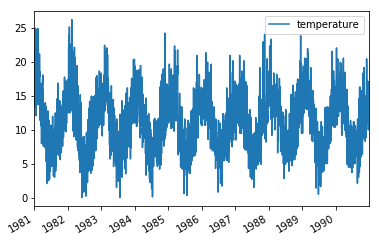

In [31]:
file_name ='../../data/daily-temperature/daily-minimum-temperatures-in-me.csv'
data = pd.read_csv(file_name, names=['temperature'], header=0, index_col=0)
data.index = pd.to_datetime(data.index)
print(data.head())
data.plot()

## Lag Plot 

빠르게 correlation이 존재하는지 확인하는 방법은 step t 와 t-1 을 scatter plot으로 그래서 확인하는 방법입니다.<br>
집접 데이터를 가공해서 만들수도 있지만, Pandas에서는 lag_plot이라는 함수를 통해서 쉽게 lag plot을 그려볼 수 있습니다.


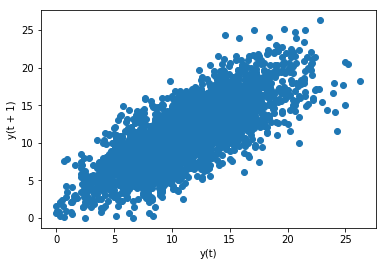

In [36]:
lag_plot(data)

step t 와 step t-1 의 관계가 전혀 없는 random한 상황속에서는 다음과 같이 그래프가 그려집니다.

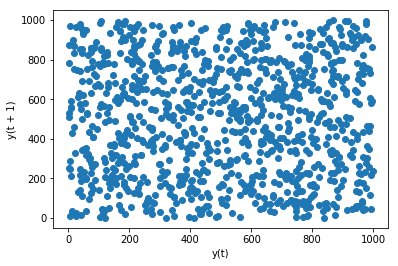

In [49]:
series = pd.Series([np.random.randint(0, 1000) for _ in range(1000)])
lag_plot(series)

## Pearson Correlation Coefficient

t-1 과 t의 상관관계를 pearson correlation으로 구할수 있습니다. <br>

* negative correlated: -1 
* positive correlated: 1
* correlation: 0.5보다 크거나, -0.5보다 작을시 높은 correlation

아래의 예제에서는 0.77487의 correlation값을 보이는데 positive correlated이며 correlation이 높다고 할 수 있습니다.

In [68]:
data2 = pd.concat([data.shift(1), data], axis=1)
data2.columns = ['t-1', 't']
data2.corr()

,t-1,t
t-1,1.00000,0.77487
t,0.77487,1.00000


## Autocorrelation Plot

각각의 lag variable에 대한 correlation을 plotting할 수 도 있지만, Pandas에서 이미 지원해주고 있습니다.

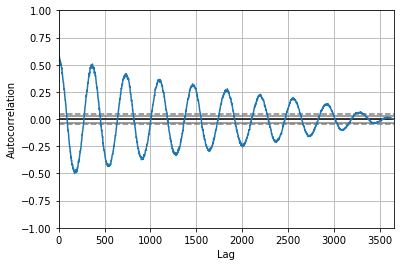

In [73]:
autocorrelation_plot(data.values)